<h1>Getting datasets from google drive to workspace </h1>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!cp -r "/content/gdrive/MyDrive/final_antispoofing.zip" "/content"

In [ ]:
import zipfile
archive = zipfile.ZipFile('/content/final_antispoofing.zip')
archive.extractall('/content')

<h1>Data Preprocessing </h1>

<h2> Four Steps </h2>
<h3>Step 1: Create new directory structure for the datasets</h3>
<h3>Step 2: Copying images into new directory structure </h3>
<h3>Step 3: Dataset Exploration </h3>
<h4> Step 4: Dataset Visualization </h3>

<h3>Step 1 </h1>

<h2>Original VS New Directory Structure</h2>

In [ ]:
from IPython import display
print("Original Vs New Dataset Structure")
display.Image('original vs new_dataset.png')

Original Vs New Dataset Structure


In [1]:
dataset_dir = 'Face_Antispoofing_System/antispoofing_big'
train_dataset_dir = 'Face_Antispoofing_System/antispoofing_big/final_antispoofing/train'
test_dataset_dir = 'Face_Antispoofing_System/antispoofing_big/final_antispoofing/test'

In [3]:
import os
os.mkdir('/content/antispoofing_dataset1')
os.mkdir('/content/antispoofing_dataset1/train')
os.mkdir('/content/antispoofing_dataset1/test')
os.mkdir('/content/antispoofing_dataset1/train/real')
os.mkdir('/content/antispoofing_dataset1/train/spoof')
os.mkdir('/content/antispoofing_dataset1/test/real')
os.mkdir('/content/antispoofing_dataset1/test/spoof')

In [2]:
train_dir='/content/antispoofing_dataset1/train'
test_dir = '/content/antispoofing_dataset1/test'

<h3>Step 2 </h3>

In [3]:
!pip list

Package                 Version
----------------------- -------------------
absl-py                 0.15.0
astunparse              1.6.3
backcall                0.2.0
cached-property         1.5.2
cachetools              4.2.4
certifi                 2021.5.30
charset-normalizer      2.0.12
clang                   5.0
colorama                0.4.5
cycler                  0.11.0
dataclasses             0.8
decorator               5.1.1
flatbuffers             1.12
gast                    0.4.0
google-auth             1.35.0
google-auth-oauthlib    0.4.6
google-pasta            0.2.0
grpcio                  1.34.1
h5py                    3.1.0
idna                    3.8
importlib-metadata      4.8.3
importlib-resources     5.4.0
ipykernel               5.5.6
ipython                 7.16.3
ipython-genutils        0.2.0
jedi                    0.17.2
jupyter-client          6.1.12
jupyter-core            4.9.2
keras                   2.6.0
keras-nightly           2.5.0.dev2021032900
Keras

In [8]:
!pip install matplotlib


In [4]:
import shutil
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [5]:
def train_test_splits(data_directory):
  for split_type in os.listdir(data_directory):
    path_to_split_type = os.path.join(data_directory,split_type)
    for category in os.listdir(path_to_split_type):
      path_to_category = os.path.join(path_to_split_type,category)
      for subject in os.listdir(path_to_category):
        path_to_subject = os.path.join(path_to_category,subject)
        for img in os.listdir(path_to_subject):
          if split_type == 'train':
            shutil.copy(os.path.join(path_to_subject,img),os.path.join(train_dir,category,img))
          else:
            shutil.copy(os.path.join(path_to_subject,img),os.path.join(test_dir,category,img))

In [8]:
train_test_splits(data_directory="C:/Users/Mano Prasad/OneDrive/Desktop/MainPro/Face_Antispoofing_System/antispoofing_big/final_antispoofing")

NameError: name 'os' is not defined

<h3>Step 3 </h3>

<h3>Dataset Exploration </h3>

In [6]:
categories = ['real','spoof']


In [7]:
import os
print("---------------------Exploring Training Datasets--------------------")
for category in categories:
  path = os.path.join(train_dir,category)
  if category == 'real':
    r1 = len(os.listdir(path))
  else:
    s1 = len(os.listdir(path))
  print("There are {} images in {} directory".format(len(os.listdir(path)),category))
print("There are {} total images in training directory".format(r1+s1))

print("-----------------------Exploring Testing Datasets-------------------------")
for category in categories:
  path = os.path.join(test_dir,category)
  if category == 'real':
    r2 = len(os.listdir(path))
  else:
    s2 = len(os.listdir(path))
  print("There are {} images in {} directory".format(len(os.listdir(path)),category))
print("There are {} total images in testing directory".format(r2+s2))

---------------------Exploring Training Datasets--------------------
There are 3896 images in real directory
There are 3585 images in spoof directory
There are 7481 total images in training directory
-----------------------Exploring Testing Datasets-------------------------
There are 1429 images in real directory
There are 1308 images in spoof directory
There are 2737 total images in testing directory


<h3>Step 4 : Dataset Visualization </h3>

In [8]:
def get_images(data_dir,number_of_samples):
  image_path = []
  for category in categories:
    path = os.path.join(data_dir,category)
    i = 1
    for img in os.listdir(path):
      if i > number_of_samples:
        break
      else:
        image_path.append(os.path.join(path,img))
        i += 1
  return image_path

In [9]:
def visualize_dataset(image_path,rows,cols):
  fig = plt.figure(figsize=(20,20))
  for i in range(1,rows * cols + 1):
    fig.add_subplot(rows,cols,i)
    img_array = cv2.imread(image_path[i-1])
    fig.subplots_adjust(hspace=1)
    plt.imshow(cv2.cvtColor(img_array,cv2.COLOR_BGR2RGB))
    plt.xlabel(image_path[i-1].split('/')[-2])
  plt.show()


In [10]:
training_image_path = get_images(data_dir= train_dir,number_of_samples=7481)
print(training_image_path)
print(len(training_image_path))

['/content/antispoofing_dataset1/train\\real\\20201110_113249.jpg', '/content/antispoofing_dataset1/train\\real\\20201110_113251.jpg', '/content/antispoofing_dataset1/train\\real\\20201110_113253.jpg', '/content/antispoofing_dataset1/train\\real\\20201110_113254.jpg', '/content/antispoofing_dataset1/train\\real\\20201110_113259hr_flip.jpg', '/content/antispoofing_dataset1/train\\real\\20201110_113317hr_flip.jpg', '/content/antispoofing_dataset1/train\\real\\20201110_113324hr_flip.jpg', '/content/antispoofing_dataset1/train\\real\\20201110_113327hr_flip.jpg', '/content/antispoofing_dataset1/train\\real\\20201110_113330hr_flip.jpg', '/content/antispoofing_dataset1/train\\real\\20201110_113334.jpg', '/content/antispoofing_dataset1/train\\real\\20201110_113337.jpg', '/content/antispoofing_dataset1/train\\real\\20201110_113350.jpg', '/content/antispoofing_dataset1/train\\real\\20201110_113353.jpg', '/content/antispoofing_dataset1/train\\real\\20201110_113404.jpg', '/content/antispoofing_dat

<h3>Training Dataset Visualization</h3>

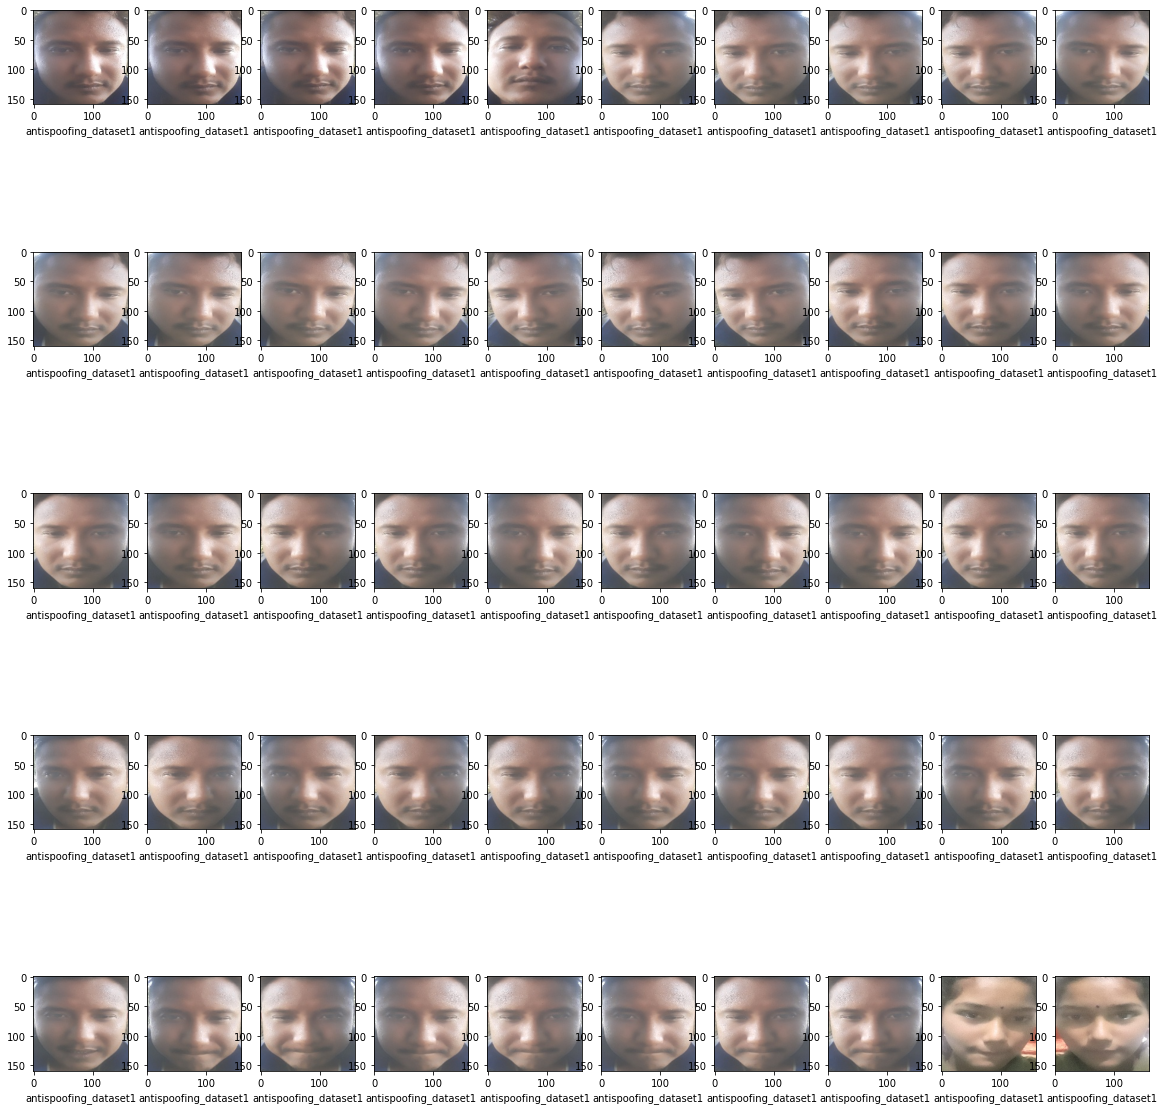

In [11]:
visualize_dataset(image_path=training_image_path,rows=5,cols=10)

Testing Dataset Visualization

In [12]:
testing_image_path = get_images(data_dir= test_dir,number_of_samples=2737)
print(testing_image_path)
print(len(testing_image_path))

['/content/antispoofing_dataset1/test\\real\\20201110_113245.jpg', '/content/antispoofing_dataset1/test\\real\\20201110_113259.jpg', '/content/antispoofing_dataset1/test\\real\\20201110_113320hr_flip.jpg', '/content/antispoofing_dataset1/test\\real\\20201110_113342.jpg', '/content/antispoofing_dataset1/test\\real\\20201110_113455hr_flip.jpg', '/content/antispoofing_dataset1/test\\real\\20201110_113509.jpg', '/content/antispoofing_dataset1/test\\real\\20201110_113513hr_flip.jpg', '/content/antispoofing_dataset1/test\\real\\20201110_113518.jpg', '/content/antispoofing_dataset1/test\\real\\20201110_113524.jpg', '/content/antispoofing_dataset1/test\\real\\20201110_113526hr_flip.jpg', '/content/antispoofing_dataset1/test\\real\\20201110_113533hr_flip.jpg', '/content/antispoofing_dataset1/test\\real\\20201110_113540.jpg', '/content/antispoofing_dataset1/test\\real\\20201110_144657.jpg', '/content/antispoofing_dataset1/test\\real\\20201110_144700.jpg', '/content/antispoofing_dataset1/test\\re

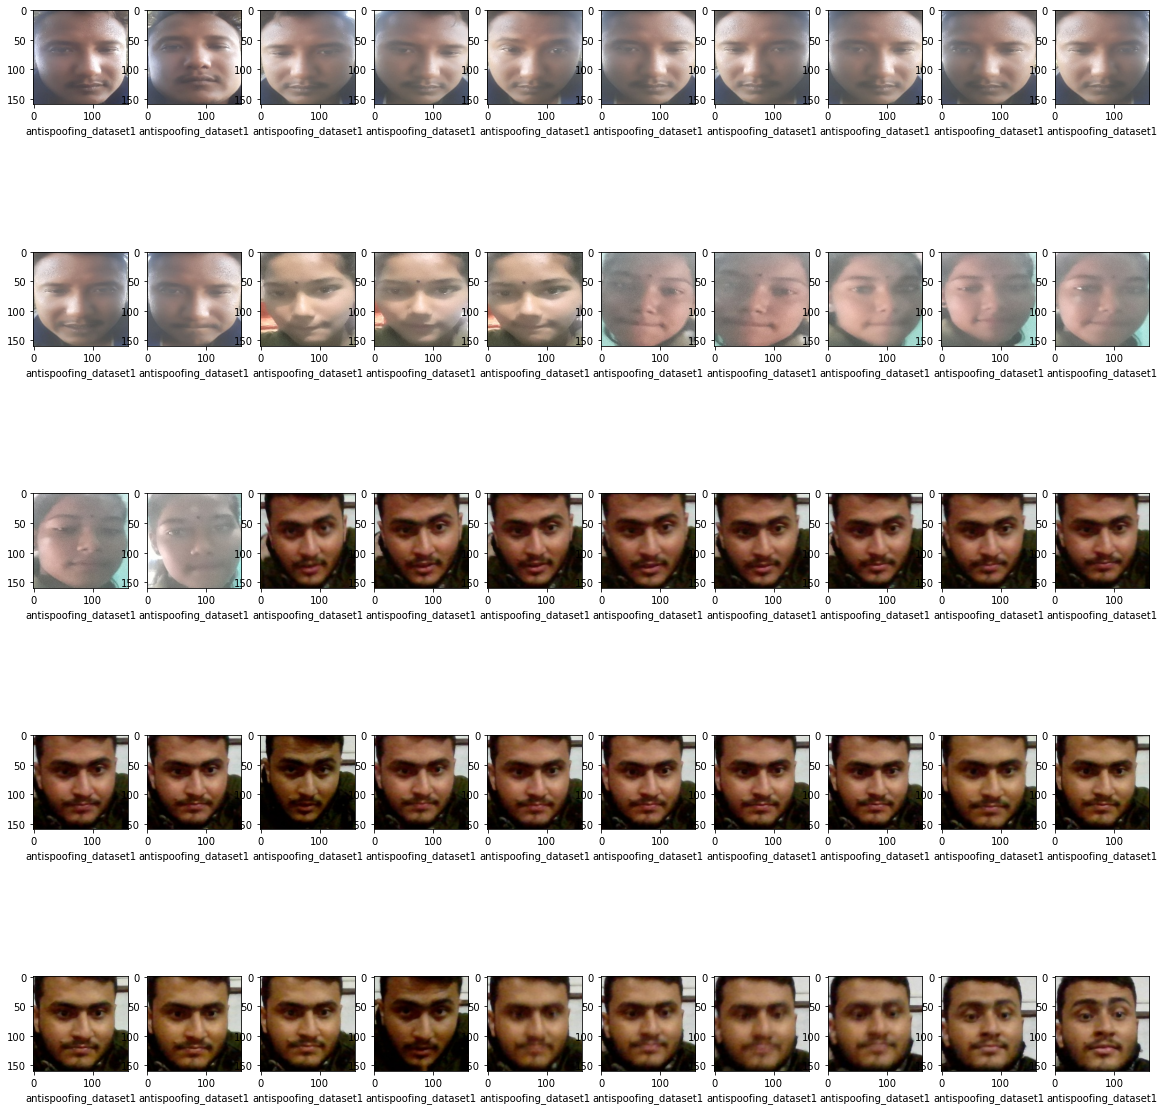

In [13]:
visualize_dataset(image_path=testing_image_path,rows=5,cols=10)

**<h3>Model Preparation</h3>**

<h3>Steps In Model Preparation</h3>
<h4>1. Choosing Framework and importing necessary libraries </h2>
<h4> 2. Load datasets and Perform image augmentations </h2>
<h4> 3. Model Selection  </h3>
<h4> 4. Compiling our model </h4>
<h4> 5. Setting our model checkpoints </h4>


<h4>Step 1 Keras Framework </h1>

In [14]:
import tensorflow

In [15]:
from tensorflow.keras.layers import Dense, Dropout, Input, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import model_from_json
import json


<h4>Step 2 </h4>

In [16]:
train_datagen = ImageDataGenerator(brightness_range=(0.8,1.2),rotation_range=30,width_shift_range=0.2,height_shift_range=0.2,fill_mode='nearest',shear_range=0.2,zoom_range=0.3,rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

In [17]:
train_generator = train_datagen.flow_from_directory(train_dir,target_size=(160,160),color_mode='rgb',
                                                    class_mode='binary',batch_size=25,shuffle=True)

Found 7481 images belonging to 2 classes.


In [18]:
valid_generator = valid_datagen.flow_from_directory(test_dir,target_size=(160,160),color_mode='rgb',
                                                    class_mode='binary',batch_size=25)

Found 2737 images belonging to 2 classes.


<h4>Step 3 Model Selection and Transfer Learning</h4>

In [19]:
mobilenet = MobileNetV2(weights="imagenet",include_top=False,input_tensor=Input(shape=(160,160,3)))

In [20]:
mobilenet.trainable = False

In [21]:
output = Flatten()(mobilenet.output)
output = Dropout(0.3)(output)
output = Dense(units = 8,activation='relu')(output)
prediction = Dense(1,activation='sigmoid')(output)

In [22]:
model = Model(inputs = mobilenet.input,outputs = prediction)
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 160, 160, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 80, 80, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 80, 80, 32)   128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 80, 80, 32)   0           bn_Conv1[0][0]                   
______________________________________________________________________________________________

<h4>Step 4 Compiling the models </h4>

In [23]:
# tell the model what cost and optimization method to use
model.compile(
  loss='binary_crossentropy',
  optimizer=Adam(
    learning_rate=0.000001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07
),
  metrics=['accuracy']
)

<h4>Step 5 Setting our model checkpoints </h4>

In [33]:
import os
os.mkdir('/content/model_weights00/')

In [24]:
model_checkpoint = ModelCheckpoint('./model_weights00/will_it_work_{epoch:02d}-{val_accuracy:.6f}.h5', monitor='val_loss', mode='min', verbose=1, save_best_only=True,save_weights_only=True)

In [30]:
!pip list

Package                 Version
----------------------- -------------------
absl-py                 0.15.0
astunparse              1.6.3
backcall                0.2.0
cached-property         1.5.2
cachetools              4.2.4
certifi                 2021.5.30
charset-normalizer      2.0.12
clang                   5.0
colorama                0.4.5
cycler                  0.11.0
dataclasses             0.8
decorator               5.1.1
flatbuffers             1.12
gast                    0.4.0
google-auth             1.35.0
google-auth-oauthlib    0.4.6
google-pasta            0.2.0
grpcio                  1.34.1
h5py                    3.1.0
idna                    3.8
importlib-metadata      4.8.3
importlib-resources     5.4.0
ipykernel               5.5.6
ipython                 7.16.3
ipython-genutils        0.2.0
jedi                    0.17.2
jupyter-client          6.1.12
jupyter-core            4.9.2
keras                   2.6.0
keras-nightly           2.5.0.dev2021032900
Keras

In [31]:
from PIL import Image


In [38]:
!pip install -u SciPy



Usage:   
  pip install [options] <requirement specifier> [package-index-options] ...
  pip install [options] -r <requirements file> [package-index-options] ...
  pip install [options] [-e] <vcs project url> ...
  pip install [options] [-e] <local project path> ...
  pip install [options] <archive url/path> ...

no such option: -u


In [44]:
import scipy
print(scipy.__version__)



1.5.2


In [46]:
from keras_preprocessing import image
from PIL import Image
import scipy


In [26]:
import os

# Define the directory path
dir_path = './model_weights00'

# Create the directory if it does not exist
if not os.path.exists(dir_path):
    os.makedirs(dir_path)


In [27]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // 25,
    validation_data=valid_generator,
    validation_steps=valid_generator.samples // 25,
    epochs=100,
    callbacks=[model_checkpoint]
)


Epoch 1/100
299/299 [==============================] - 65s 217ms/step - loss: 0.7644 - accuracy: 0.5252 - val_loss: 0.6891 - val_accuracy: 0.5130

Epoch 00001: val_loss improved from 0.72222 to 0.68913, saving model to ./model_weights00\will_it_work_01-0.513028.h5
Epoch 2/100
299/299 [==============================] - 66s 219ms/step - loss: 0.7056 - accuracy: 0.5506 - val_loss: 0.6729 - val_accuracy: 0.5461

Epoch 00002: val_loss improved from 0.68913 to 0.67289, saving model to ./model_weights00\will_it_work_02-0.546055.h5
Epoch 3/100
299/299 [==============================] - 64s 215ms/step - loss: 0.6758 - accuracy: 0.5818 - val_loss: 0.6573 - val_accuracy: 0.5824

Epoch 00003: val_loss improved from 0.67289 to 0.65728, saving model to ./model_weights00\will_it_work_03-0.582385.h5
Epoch 4/100
299/299 [==============================] - 64s 215ms/step - loss: 0.6451 - accuracy: 0.6084 - val_loss: 0.6330 - val_accuracy: 0.6514

Epoch 00004: val_loss improved from 0.65728 to 0.63302, sa

In [28]:
# serialize model to JSON
model_json = model.to_json()
with open("finalyearproject_antispoofing_model_mobilenet.json", "w") as json_file:
    json_file.write(model_json)

c:\Users\Mano Prasad\anaconda3\envs\spoooferzz\lib\site-packages\tensorflow\python\keras\utils\generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


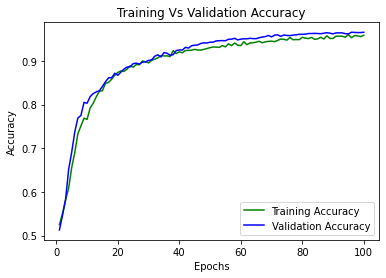

In [29]:
import matplotlib.pyplot as plt
train_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']
epochs = range(1,101)
plt.plot(epochs,train_accuracy,'g',label='Training Accuracy')
plt.plot(epochs,validation_accuracy,'b',label='Validation Accuracy')
plt.title('Training Vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
    

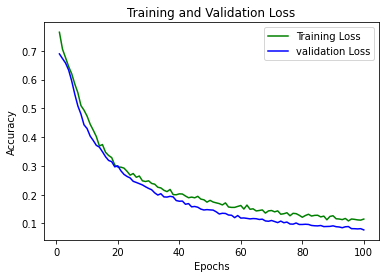

In [30]:
import matplotlib.pyplot as plt
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,101)
plt.plot(epochs,train_loss,'g', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [32]:
from tensorflow.keras.preprocessing import image
import numpy as np
def check_fakes(path,category_type):
  predictor = {}
  path= os.path.join(path,category_type)
  for img in os.listdir(path):
    try:
      img = image.load_img(os.path.join(path,img),target_size=(160,160))
      img = image.img_to_array(img)
      img = np.expand_dims(img,axis=0)
      img = img / 255.0
      prediction = model.predict(img)
      if prediction > 0.5:
        prediction_class = 1
      else:
        prediction_class = 0
      result = categories[prediction_class]
      if result not in predictor:
        predictor[result] = 1
      else:
        predictor[result] += 1
    except Exception as e:
      pass
  return predictor

In [33]:
check_fakes(test_dir,categories[1])

{'spoof': 1248, 'real': 60}

In [34]:
check_fakes(test_dir,categories[0])

{'real': 1396, 'spoof': 33}

In [ ]:
(19+6)/(19+455+471+6)*100

2.6288117770767614

In [ ]:
100-2.6288

97.3712